# **Harry Potter - Text Analysis**

### **Books in the Harry Potter series**

**1. Harry Potter and the Sorcerer's Stone** <br> **2. Harry Potter and the Chamber of Secrets** <br> **3. Harry Potter and the Prisoner of Azkaban** <br> **4. Harry Potter and the Goblet of Fire** <br> **5. Harry Potter and the Order of the Phoenix** <br> **6. Harry Potter and the Half-Blood Prince** <br> **7. Harry Potter and the Deathly Hallows**

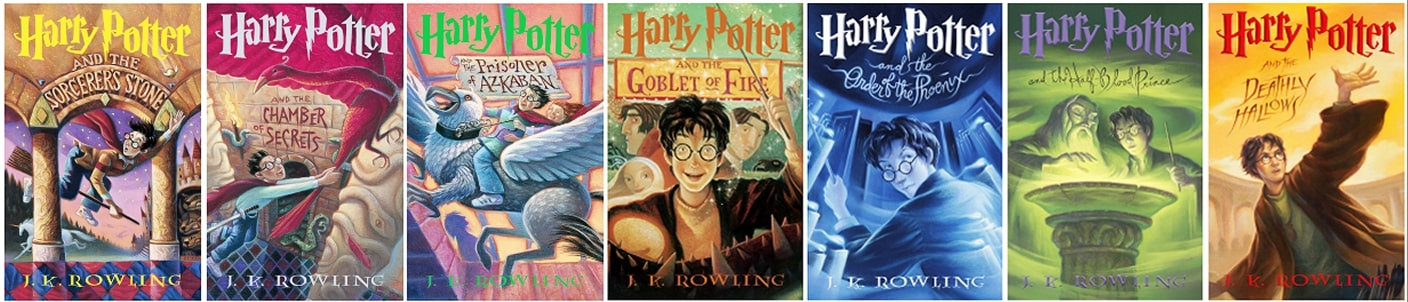


## Table of contents 📓
-----------------------------------------------------
**1. [Import Libraries](#section1)**

**2. [Read the text file](#section2)** 

**3. [Sentence Tokenisation](#section3)** 

**4. [Bag of Words](#section4)** 

**5. [Exploratory Data Analysis](#section5)**

-----------------------------------------------------

### <font color= 'brown'>1. Import Libraries</font> <a class="anchor" id="section1" ></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import string

### <font color='brown'>2. Read the text file</font> <a class="anchor" id="section2"></a>

In [2]:
# Read the text file
with open("../input/harry-potter-books-corpora-part-1-7/Book1.txt") as f:
    book1 = f.read()

In [3]:
# Convert to lower case and check first 100 characters 
book1 = book1.lower()
book1[1:100]

' \n\n\n\n\nthe boy who lived \n\nmr. and mrs. dursley, of number four, privet drive, \nwere proud to say th'

*We have \n added as part of string, which needs to be removed from the corpus*

In [4]:
# Remove '\n' from the corpus
book1_cln = re.sub('\n','',book1)
book1_cln[:100]

'/ the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they '

In [5]:
# Remove the punctuation marks from the corpus

print("All punctuation marks -",string.punctuation)

# For loop to replace each punctuation mark with None in the corpus
for p in string.punctuation:
    # not removed in the corpus, as it is used to differentiate the sentences
    if p not in ['.',',']: 
        book1_cln = book1_cln.replace(p,'')

book1_cln[:100]

All punctuation marks - !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


' the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they w'

### <font color='brown'>3. Sentence tokenization</font><a class="anchor" id ="section3"></a>

In [6]:
# Tokenize the corpus into sentences in form of list
sentence = sent_tokenize(book1_cln)
print(sentence[:5])

# length of sentences
print('\n')
print("Total number of sentences in this book - ",len(sentence))

[' the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much.', 'they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.', 'mr. dursley was the director of a firm called grunnings, which made drills.', 'he was a big, beefy man with hardly any neck, although he did have a very large mustache.', 'mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.']


Total number of sentences in this book -  4633


In [7]:
# Footer sentence is there as part of corpus - as shown
footer = [s for s in sentence if s.startswith('page')]
footer[:5]

['page  7 harry potter and the philosophers stone  j.k. rowling mrs. dursley came into the living room carrying two cups of tea.',
 'page  13 harry potter and the philosophers stone  j.k. rowling professor mcgonagall’s voice trembled as she went on.',
 'page  21 harry potter and the philosophers stone  j.k. rowling when he was dressed he went down the hall into the kitchen.',
 'page  22 harry potter and the philosophers stone  j.k. rowling about once a week, uncle vernon looked over the top of his newspaper and shouted that harry needed a haircut.',
 'page  29 harry potter and the philosophers stone  j.k. rowling “do it again,” dudley ordered.']

In [8]:
# Using regex pattern to remove this footer sentence from the corpus
sent_clean = []
for s in sentence:
    s = re.sub("page  \d+ harry potter and the philosophers stone  j.k. rowling",'',s)
    sent_clean.append(s)

In [9]:
# Joining the list of sentences to get cleaned corpus
corpus = ''.join(sent_clean)

### <font color='brown' >4. Bag of Words</font> <a class = "anchor" id = "section4"></a>

Using word tokenizer, to create bag of words from the corpus

In [10]:
words = word_tokenize(corpus)
print(words[:10])

stop_words = list(stopwords.words('english'))
my_stopwords = stop_words + ['.',',','“','’','”','—','...']
words = [w for w in words if w not in my_stopwords]

# length of words
print('\n')
print("Total number of words in this book - ",len(words))

['the', 'boy', 'who', 'lived', 'mr.', 'and', 'mrs.', 'dursley', ',', 'of']


Total number of words in this book -  40485


In [11]:
# Finding the frequency of each unique words
count_dict = Counter(words)

print("Number of unique words in the book -",len(count_dict.keys()))

Number of unique words in the book - 8895


In [12]:
# Converting to dataframe for analysis
bow_df = pd.DataFrame(count_dict.items()).rename(columns={0:'word',1:'count'})
bow_df.head()

,word,count
0,boy,75
1,lived,8
2,mr.,63
3,mrs.,39
4,dursley,55


In [13]:
bigrm = nltk.bigrams(words)
bigram_fd = nltk.FreqDist(bigrm)
bigram_fd.most_common(10)

[(('said', 'harry'), 85),
 (('uncle', 'vernon'), 78),
 (('professor', 'mcgonagall'), 63),
 (('said', 'hagrid'), 62),
 (('said', 'ron'), 60),
 (('said', 'ron.'), 43),
 (('said', 'harry.'), 40),
 (('aunt', 'petunia'), 36),
 (('harry', 'potter'), 34),
 (('harry', 'ron'), 27)]

### <font color ='brown'>5. Explanatory Data Analysis</font> <a class="anchor" id = "section5"></a>

Text(0.5, 1.0, 'Appearance of Key characters')

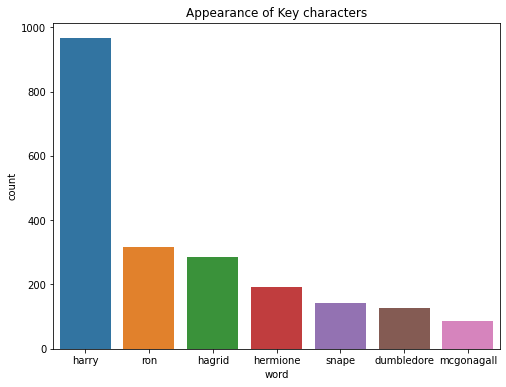

In [14]:
# Appearance of key characters in the book
key_char = ['harry','ron','hermione','dumbledore','snape','hagrid','mcgonagall']

d = bow_df[bow_df['word'].isin(key_char)].sort_values(by='count',ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x = d['word'],y = d['count'])
plt.title("Appearance of Key characters")